<a href="https://colab.research.google.com/github/mihir-mj/ProjectIdeas/blob/master/ASL1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import keras
import numpy as np
import pandas as pd
import cv2 
from keras.models import Sequential 
from keras.layers import Conv2D,MaxPooling2D, Dense,Flatten
from keras.datasets import mnist 
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.optimizers import SGD

Using TensorFlow backend.


In [0]:
!pip install PyDrive

In [0]:
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
download = drive.CreateFile({'id': '1yaOJJbHLeodcpHJEnCs-xyXe9364byjn'})
download.GetContentFile('train.csv')
train = pd.read_csv('train.csv')

In [0]:
download = drive.CreateFile({'id': '1UiJkIHqYTzYlTq_ljdRBwM4GBFUCbf3u'})
download.GetContentFile('test.csv')
test = pd.read_csv('test.csv')

In [0]:
display(train.info())

display(test.info())

display(train.head(n = 2))
display(test.head(n = 2))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27455 entries, 0 to 27454
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 164.4 MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7172 entries, 0 to 7171
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 43.0 MB


None

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,156,158,160,163,165,159,166,168,170,170,171,171,171,172,171,171,170,170,169,111,121,129,135,141,144,148,151,154,157,160,...,205,206,206,207,207,206,206,204,205,204,203,202,142,151,160,172,196,188,188,190,135,96,86,77,77,79,176,205,207,207,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,157,158,156,154,154,153,152,151,149,149,148,147,146,144,142,143,138,92,108,158,159,159,159,160,160,160,160,160,160,160,...,100,78,120,157,168,107,99,121,133,97,95,120,135,116,95,79,69,86,139,173,200,185,175,198,124,118,94,140,133,84,69,149,128,87,94,163,175,103,135,149


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,152,152,152,152,152,153,153,151,152,152,153,152,152,151,151,150,150,150,149,150,150,150,152,152,151,152,152,152,152,152,...,131,134,144,147,125,87,87,103,107,110,116,113,75,74,74,74,76,74,82,134,168,155,146,137,145,146,149,135,124,125,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,138,137,137,138,138,139,137,142,140,138,139,137,137,136,135,134,133,134,132,129,132,134,135,135,137,139,139,139,140,141,...,114,112,89,48,133,194,182,185,184,184,182,181,172,174,177,178,178,179,181,183,187,175,165,154,118,107,100,75,96,83,47,104,194,183,186,184,184,184,182,180


In [0]:
train_Y = train['label']
test_Y = test['label']
train_X = train.drop(['label'],axis = 1)
test_X = test.drop(['label'],axis = 1)

In [0]:
train_X = train_X.astype('float32') / 255
test_X = test_X.astype('float32')/255

In [0]:
display(train_Y)

0         3
1         6
2         2
3         2
4        13
         ..
27450    13
27451    23
27452    18
27453    17
27454    23
Name: label, Length: 27455, dtype: int64

In [0]:
train_X = train_X.values.reshape(27455,784)
test_X = test_X.values.reshape(7172,784)
train_Y = keras.utils.to_categorical(train_Y,26)
test_Y = keras.utils.to_categorical(test_Y,26)

In [0]:
model = Sequential()
model.add(Dense(units=128,activation="relu",input_shape=(784,)))
model.add(Dense(units=128,activation="relu"))
model.add(Dense(units=128,activation="relu"))
model.add(Dense(units=26,activation="softmax"))

In [0]:
model.compile(optimizer=SGD(0.001),loss="categorical_crossentropy",metrics=["accuracy"])
model.fit(train_X,train_Y,batch_size=32,epochs=100,verbose=1)



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/100





27455/27455 [==============================] - 11s 405us/step - loss: 3.2170 - acc: 0.0444
Epoch 2/100
27455/27455 [==============================] - 3s 101us/step - loss: 3.1415 - acc: 0.1061
Epoch 3/100
27455/27455 [==============================] - 3s 96us/step - loss: 3.0738 - acc: 0.1641
Epoch 4/100
27455/27455 [==============================] - 3s 109us/step - loss: 2.9959 - acc: 0.2004
Epoch 5/100
27455/27455 [==============================] - 3s 101us/step - loss: 2.8948 - acc: 0.2336
Epoch 6/100
27455/27455 [==============================] - 3s 102us/step - loss: 2.7663 - acc: 0.2671
Epoch 7/100
27455/27455 [==============================] - 3s 97us/step - loss: 2.6177 - acc: 0.3041
Epoch 8/100
27455/27455 [==============================] - 3s 99us/step - loss: 2.4594 - acc: 0.3292
Epoch 9/100
27455/27455 [==============================] - 3s 101us/step - loss: 2

In [0]:
accuracy = model.evaluate(x=test_X,y=test_Y,batch_size=32)
print("Accuracy: ",accuracy[1])

7172/7172 [==============================] - 0s 42us/step
Accuracy:  0.6910206358059119


In [0]:
img = test_X[6]
test_img = img.reshape((1,784))
img_class = model.predict_classes(test_img)
prediction = img_class[0]
classname = img_class[0]
print("Class: ",classname)

Class:  10


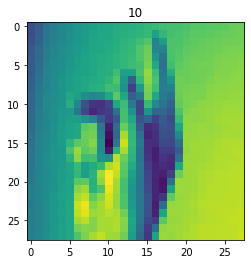

In [0]:
img = img.reshape((28,28))
plt.imshow(img)
plt.title(classname)
plt.show()

In [0]:
model.save_weights('model_weights.h5')
weights_file = drive.CreateFile({'title' : 'model_weights.h5'})
weights_file.SetContentFile('model_weights.h5')
weights_file.Upload()
drive.CreateFile({'id': weights_file.get('id')})

GoogleDriveFile({'id': '14DLIi_STeTMB2E3S2lDpFqydzfkyinuq'})

In [0]:
model.save('model.h5')
weights_file = drive.CreateFile({'title' : 'model.h5'})
weights_file.SetContentFile('model.h5')
weights_file.Upload()
drive.CreateFile({'id': weights_file.get('id')})


GoogleDriveFile({'id': '10iAyVZVrAzRo8jJVgsgp0p5gOuVAmgaF'})

In [0]:
!pip install h5py pyyaml